Whether out at a restaurant or buying tickets to a concert, modern life counts on the convenience of a credit card to make daily purchases. It saves us from carrying large amounts of cash and also can advance a full purchase that can be paid over time. How do card issuers know we'll pay back what we charge? That's a complex problem with many existing solutions—and even more potential improvements, to be explored in this competition.

Credit default prediction is central to managing risk in a consumer lending business. Credit default prediction allows lenders to optimize lending decisions, which leads to a better customer experience and sound business economics. Current models exist to help manage risk. But it's possible to create better models that can outperform those currently in use.

American Express is a globally integrated payments company. The largest payment card issuer in the world, they provide customers with access to products, insights, and experiences that enrich lives and build business success.

The objective of [this competition](https://www.kaggle.com/competitions/amex-default-prediction) is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. In this competition, you'll apply your machine learning skills to predict credit default. Specifically, you will leverage an industrial scale data set to build a machine learning model that challenges the current model in production. Training, validation, and testing datasets include time-series behavioral data and anonymized customer profile information. You're free to explore any technique to create the most powerful model, from creating features to using the data in a more organic way within a model.

If successful, you'll help create a better customer experience for cardholders by making it easier to be approved for a credit card. Top solutions could challenge the credit default prediction model used by the world's largest payment card issuer—earning you cash prizes, the opportunity to interview with American Express, and potentially a rewarding new career.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr
/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [2]:
# Libraries for data visulaization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #To supress warnings

### **Loading train_labels.csv file**

In [3]:
train_labels = pd.read_csv("../input/amex-default-prediction/train_labels.csv") #Loading dataset
train_labels.head() #To see first five rows of the dataset

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [4]:
train_labels['target'].value_counts() #Counts unique values

0    340085
1    118828
Name: target, dtype: int64

### **Loading train_data.ftr, test_data.ftr files**

There are a total of 190 variables in the dataset with approximately 450,000 customers in the training set and 925,000 in the test set. This dataset is prodigious and reading it directly consumes the entire memory. There are two options to overcome this problem:

* Read data chunk by chunk
* Use a compressed dataset

The disadvantage of reading data chunk by chunk is we cannot explore the entire data distribution.

 Second option is using the compressed version of the train and test sets provided by @munumbutt's [AMEX-Feather-Dataset](https://www.kaggle.com/datasets/munumbutt/amexfeather).

In [5]:
train_data = pd.read_feather("../input/amexfeather/train_data.ftr")

In [6]:
train_data.tail() #Displays last 5 rows of a dataset

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979492,0.416016,0.020813,0.828125,0.003487,0.090759,0.005341,0.025146,...,NaN,NaN,0.006836,0.003679,0.000457,NaN,0.000906,0.001497,0.002775,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984863,0.296631,0.007210,0.812500,0.005905,0.079895,0.002243,0.023697,...,NaN,NaN,0.003309,0.007095,0.007858,NaN,0.002777,0.008224,0.008858,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.982910,0.444092,0.013153,0.815430,0.003456,0.100525,0.002111,0.012344,...,NaN,NaN,0.009956,0.009995,0.001088,NaN,0.005692,0.006775,0.005566,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969727,0.442627,0.009857,1.003906,0.005116,0.101807,0.009933,0.008575,...,NaN,NaN,0.005543,0.006565,0.009880,NaN,0.008125,0.001168,0.003983,0
5531450,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-03-14,0.981934,0.002474,0.000077,0.992676,0.000809,0.119141,0.003286,0.014091,...,NaN,NaN,0.007317,0.002888,0.006207,NaN,0.005112,0.003183,0.001914,0


In [7]:
test_data = pd.read_feather("../input/amexfeather/test_data.ftr")
sample_submission = pd.read_csv("../input/amex-default-prediction/sample_submission.csv")

In [8]:
test_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631348,0.001912,0.010727,0.814453,0.007545,0.168701,0.009972,0.002348,...,NaN,NaN,NaN,NaN,0.004669,NaN,NaN,NaN,0.008278,NaN
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.586914,0.005276,0.011024,0.811035,0.001817,0.241333,0.000166,0.009132,...,NaN,NaN,NaN,0.000142,0.004940,0.009018,NaN,0.003695,0.003754,0.001460
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.608887,0.003326,0.016388,1.004883,0.000114,0.267090,0.004196,0.004192,...,NaN,NaN,NaN,0.000074,0.002113,0.004658,NaN,0.003155,0.002155,0.006481
3,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-05-20,0.614746,0.009064,0.021667,0.816406,0.009720,0.188965,0.004124,0.015327,...,NaN,NaN,NaN,0.004742,0.006393,0.002890,NaN,0.006042,0.005207,0.007858
4,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-06-15,0.591797,0.238770,0.015930,0.810547,0.002026,0.180054,0.000731,0.011284,...,NaN,NaN,NaN,0.008133,0.004330,0.008385,NaN,0.001008,0.007420,0.009468


In [9]:
print("Shape of train data:",train_data.shape)
print("Shape of test data:",test_data.shape)

Shape of train data: (5531451, 191)
Shape of test data: (11363762, 190)


To get a summary of a dataframe we use info() function. This method prints information about a dataframe including the index dtypes, column dtypes, non-null values and memory usage.

In [10]:
train_data.info(max_cols=191 ,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 191 columns):
 #    Column       Non-Null Count    Dtype         
---   ------       --------------    -----         
 0    customer_ID  5531451 non-null  object        
 1    S_2          5531451 non-null  datetime64[ns]
 2    P_2          5485466 non-null  float16       
 3    D_39         5531451 non-null  float16       
 4    B_1          5531451 non-null  float16       
 5    B_2          5529435 non-null  float16       
 6    R_1          5531451 non-null  float16       
 7    S_3          4510907 non-null  float16       
 8    D_41         5529435 non-null  float16       
 9    B_3          5529435 non-null  float16       
 10   D_42         791314 non-null   float16       
 11   D_43         3873055 non-null  float16       
 12   D_44         5257132 non-null  float16       
 13   B_4          5531451 non-null  float16       
 14   D_45         5529434 non-null  float16       
 1

We can verify the presence of null values using isnull() function.

In [11]:
train_data.isnull().sum()

customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
                ...   
D_142          4587043
D_143           101548
D_144            40727
D_145           101548
target               0
Length: 191, dtype: int64

 I will take the latest statement for each customer.

In [12]:
train_data1 = train_data.groupby('customer_ID').tail(1).set_index('customer_ID')
test_data1 = test_data.groupby('customer_ID').tail(1).set_index('customer_ID')

### **Exploratory Data Analysis**

The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.

The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:  
**`D_*`:** Delinquency variables  
**`S_*`:** Spend variables  
**`P_*`:** Payment variables  
**`B_*`:** Balance variables  
**`R_*`:** Risk variables  
With the following features being categorical: `B_30`, `B_38`, `D_63`, `D_64`, `D_66`, `D_68`, `D_114`, `D_116`, `D_117`, `D_120`, `D_126`. 

In [13]:
feat_Delinquency = [c for c in train_data.columns if c.startswith('D_')]
feat_Spend = [c for c in train_data.columns if c.startswith('S_')]
feat_Payment = [c for c in train_data.columns if c.startswith('P_')]
feat_Balance = [c for c in train_data.columns if c.startswith('B_')]
feat_Risk = [c for c in train_data.columns if c.startswith('R_')]
print(f'Total number of Delinquency variables: {len(feat_Delinquency)}')
print(f'Total number of Spend variables: {len(feat_Spend)}')
print(f'Total number of Payment variables: {len(feat_Payment)}')
print(f'Total number of Balance variables: {len(feat_Balance)}')
print(f'Total number of Risk variables: {len(feat_Risk)}')

Total number of Delinquency variables: 96
Total number of Spend variables: 22
Total number of Payment variables: 3
Total number of Balance variables: 40
Total number of Risk variables: 28


In [14]:
import plotly.express as px
labels=['Delinquency', 'Spend','Payment','Balance','Risk']
values= [len(feat_Delinquency), len(feat_Spend),len(feat_Payment), len(feat_Balance),len(feat_Risk)]
fig = px.pie(train_data, values=values, names=labels)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### **EDA on train data**

In [15]:
missing_train_data = train_data.isna().sum().div(len(train_data)).mul(100).sort_values(ascending=False)

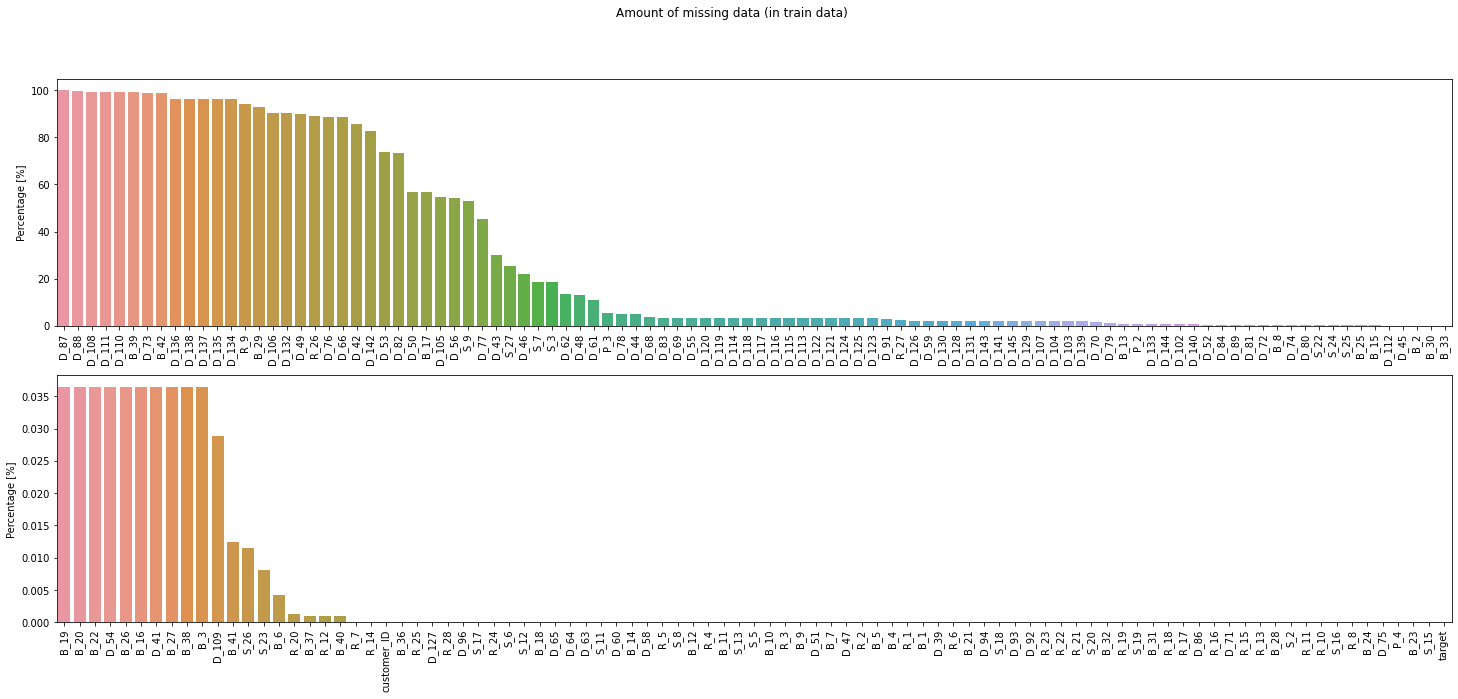

In [16]:
fig, ax = plt.subplots(2,1, figsize=(25,10))
sns.barplot(x=missing_train_data[:100].index, y=missing_train_data[:100].values, ax=ax[0])
sns.barplot(x=missing_train_data[100:].index, y=missing_train_data[100:].values, ax=ax[1])
ax[0].set_ylabel("Percentage [%]"), ax[1].set_ylabel("Percentage [%]")
ax[0].tick_params(axis='x', rotation=90); ax[1].tick_params(axis='x', rotation=90)
plt.suptitle("Amount of missing data (in train data)")
plt.show()

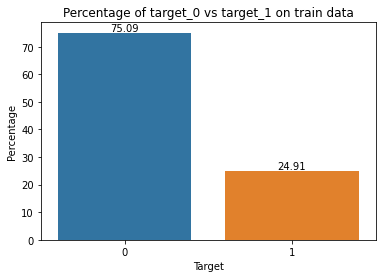

In [17]:
target = train_data["target"].value_counts()
target_0 = round((target[0]/train_data['target'].count()*100),2)
target_1 = round((target[1]/train_data['target'].count()*100),2)
target_percentage = {'Target':['0', '1'], 'Percentage':[target_0, target_1]} 
df_target_percentage = pd.DataFrame(target_percentage)
groupedvalues = df_target_percentage.groupby('Percentage').sum().reset_index()

ax = sns.barplot(x='Target',y='Percentage', data=df_target_percentage, errwidth=0)
plt.title('Percentage of target_0 vs target_1 on train data')
ax.bar_label(ax.containers[0])
plt.show()

From the above plot, it can be inferred visually that target = 0 rows are more than target = 1 rows. It means the dataset is imbalanced with majority class 'target = 0' and minority 'target = 1'.

24.91% of customers had a default - it is worth talking to these two different groups and find dome key differences.

In [18]:
print(f'Number of unique customers: {train_data["customer_ID"].nunique()}')

Number of unique customers: 458913


There are 458913 unique customers.

In [19]:
customers = train_data.groupby(['customer_ID','target']).size().reset_index()
customers = customers.rename(columns={0:'Count'})
customers.head()

,customer_ID,target,Count
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,13
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,13
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,13
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,13
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,13


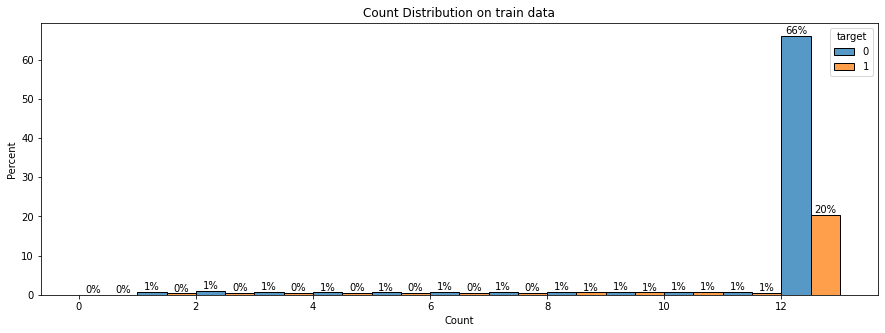

In [20]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.histplot(x='Count', data=customers, hue='target', stat='percent', multiple="dodge", bins=np.arange(0,14), ax=ax)
ax.bar_label(ax.containers[0], fmt='%.f%%')
ax.bar_label(ax.containers[1], fmt='%.f%%')
plt.title("Count Distribution on train data")
plt.show()

In [21]:
del customers

In [22]:
statement = train_data.groupby('customer_ID')['S_2'].max().reset_index()
statement.head()

,customer_ID,S_2
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2018-03-29
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2018-03-30


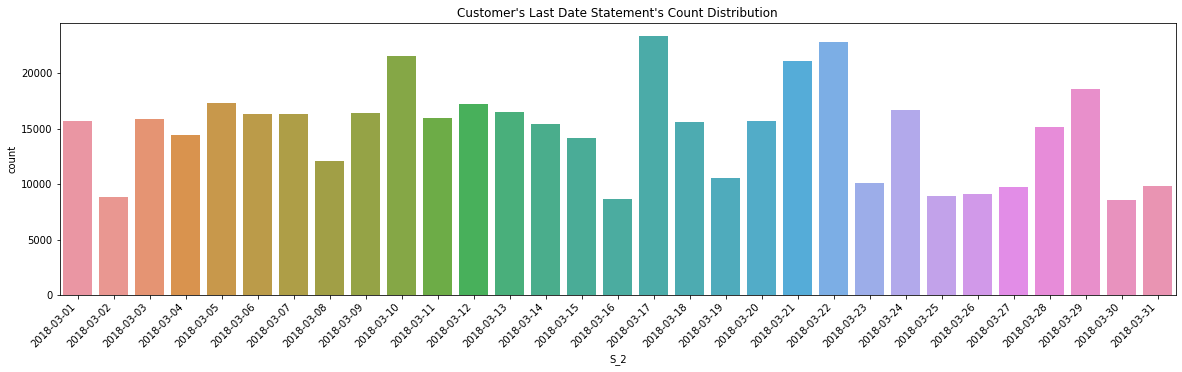

In [23]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()

a=sns.countplot(data=statement,x=statement['S_2'])
x_dates = statement['S_2'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.title("Customer's Last Date Statement's Count Distribution")
plt.show()

del statement

In [24]:
import gc
gc.collect()

61

### **EDA on test data**

In [25]:
missing_test_data = test_data.isna().sum().div(len(test_data)).mul(100).sort_values(ascending=False)

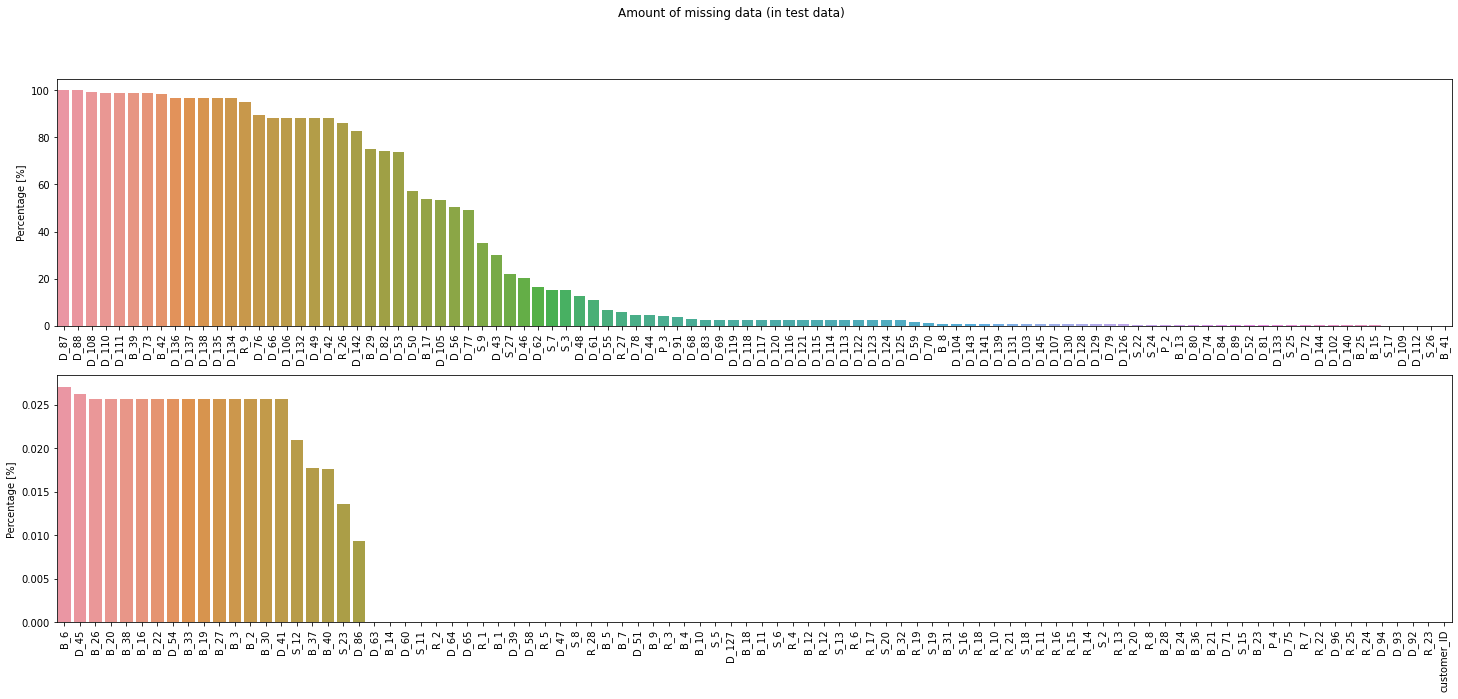

In [26]:
fig, ax = plt.subplots(2,1, figsize=(25,10))
sns.barplot(x=missing_test_data[:100].index, y=missing_test_data[:100].values, ax=ax[0])
sns.barplot(x=missing_test_data[100:].index, y=missing_test_data[100:].values, ax=ax[1])
ax[0].set_ylabel("Percentage [%]"), ax[1].set_ylabel("Percentage [%]")
ax[0].tick_params(axis='x', rotation=90); ax[1].tick_params(axis='x', rotation=90)
plt.suptitle("Amount of missing data (in test data)")
plt.show()

In [27]:
customers = test_data.groupby(['customer_ID']).size().reset_index()
customers = customers.rename(columns={0:'Count'})
customers.head()

,customer_ID,Count
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,9
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,13
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,13
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,13
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,13


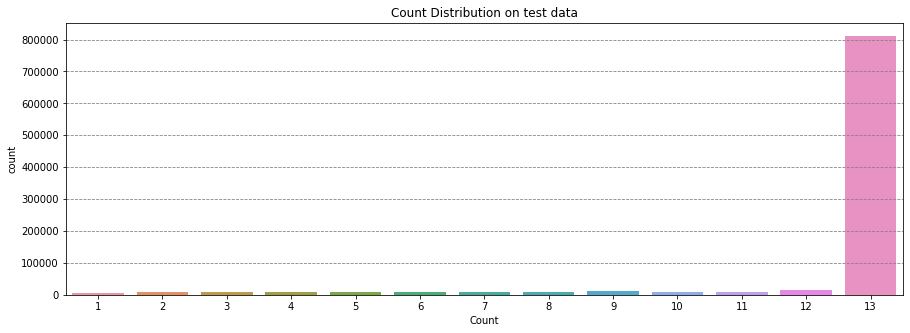

In [28]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.countplot(x = 'Count',data=customers)
ax.grid(linestyle="--",axis='y',color='gray')
plt.title("Count Distribution on test data")
plt.show()

In [29]:
del customers

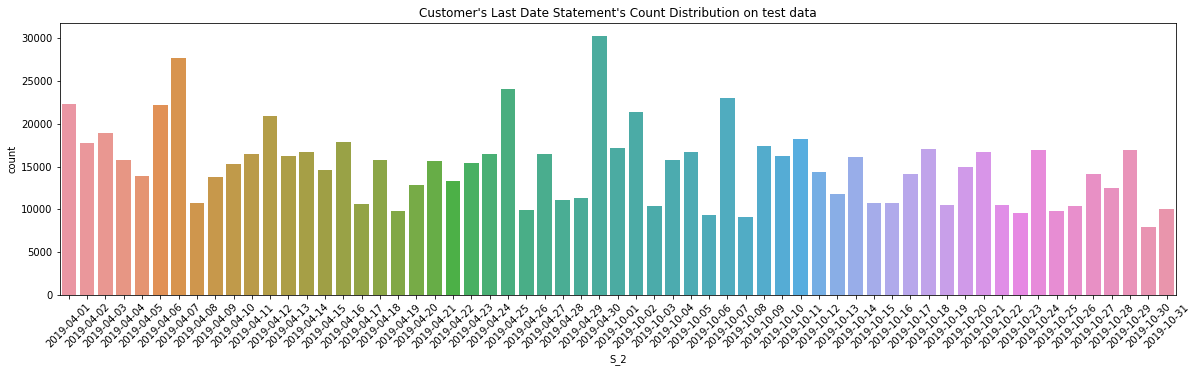

In [30]:
statement = test_data.groupby('customer_ID')['S_2'].max().reset_index()
fig = plt.figure(figsize=(20,5))
ax = plt.axes()

a=sns.countplot(data=statement,x=statement['S_2'])
x_dates = statement['S_2'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45)
plt.title("Customer's Last Date Statement's Count Distribution on test data")
plt.show()


In [31]:
del statement

In [32]:
gc.collect()

6404

### **Distribution of Continuos Deliquency Variables**

In [33]:
cat_var= ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
obj_col=['customer_ID', 'S_2']

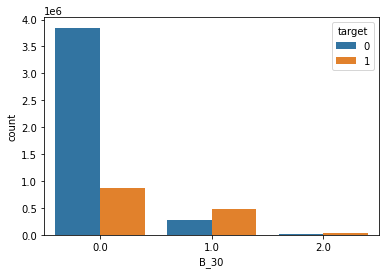

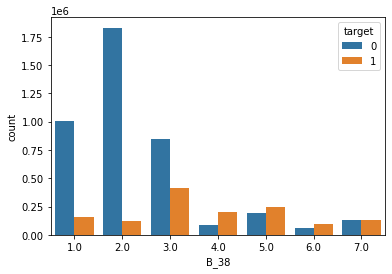

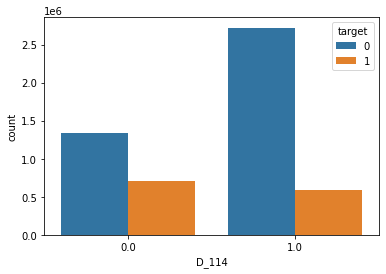

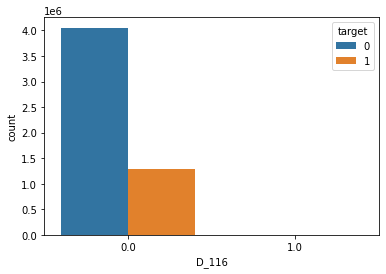

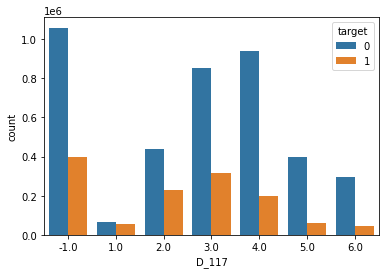

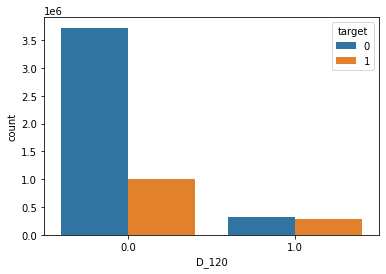

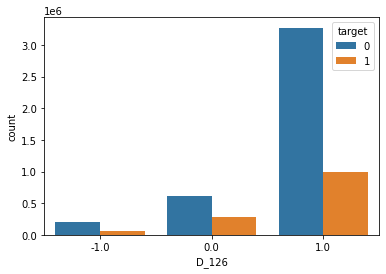

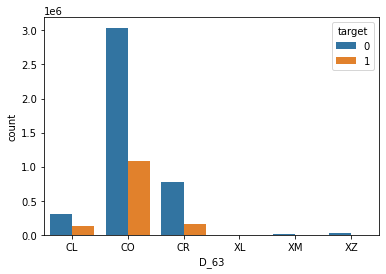

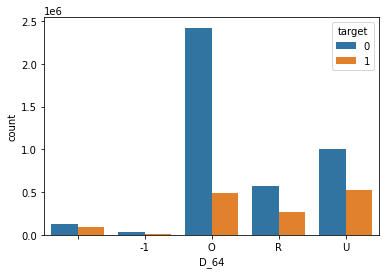

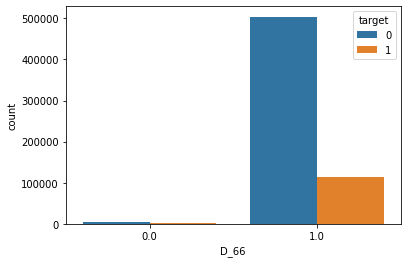

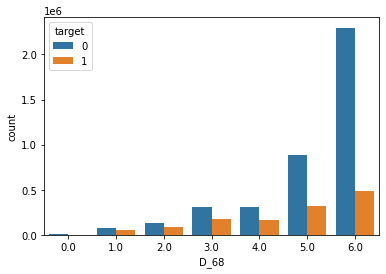

In [34]:
for i in cat_var:
    sns.countplot(data=train_data,x=i, hue='target')
    plt.show()

In [35]:
del_cols = [c for c in train_data1.columns if (c.startswith(('D','t'))) & (c not in cat_var)] #Delinquency
df_del = train_data1[del_cols]
spd_cols = [c for c in train_data1.columns if (c.startswith(('S','t'))) & (c not in cat_var)] #Spend
df_spd = train_data1[spd_cols]
pay_cols = [c for c in train_data1.columns if (c.startswith(('P','t'))) & (c not in cat_var)] #Payment
df_pay = train_data1[pay_cols]
bal_cols = [c for c in train_data1.columns if (c.startswith(('B','t'))) & (c not in cat_var)] #Balance
df_bal = train_data1[bal_cols]
ris_cols = [c for c in train_data1.columns if (c.startswith(('R','t'))) & (c not in cat_var)] #Risk
df_ris = train_data1[ris_cols]

In [36]:
gc.collect()

37051

In [37]:
import math
def kdeplot(cols,df,title,figsize):
    plt_cols = 5
    plt_rows = math.ceil(len(cols)/plt_cols)
    
    fig, axes = plt.subplots(plt_rows, plt_cols, figsize = figsize)
    for i, ax in enumerate(axes.reshape(-1)):
        if i < len(cols) - 1:
            sns.kdeplot(x = cols[i], hue='target', data = df, fill = True, ax = ax)
            ax.tick_params()
            ax.xaxis.get_label()
            ax.set_ylabel('')
    fig.suptitle(title, fontsize = 35, x = 0.5, y = 1)
    plt.tight_layout()
    plt.show()

In [38]:
def corr(df,title,figsize):
    plt.figure(figsize =figsize)
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype = bool))
    sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6)
    plt.title(title)
    plt.show()

In [39]:
gc.collect()

69

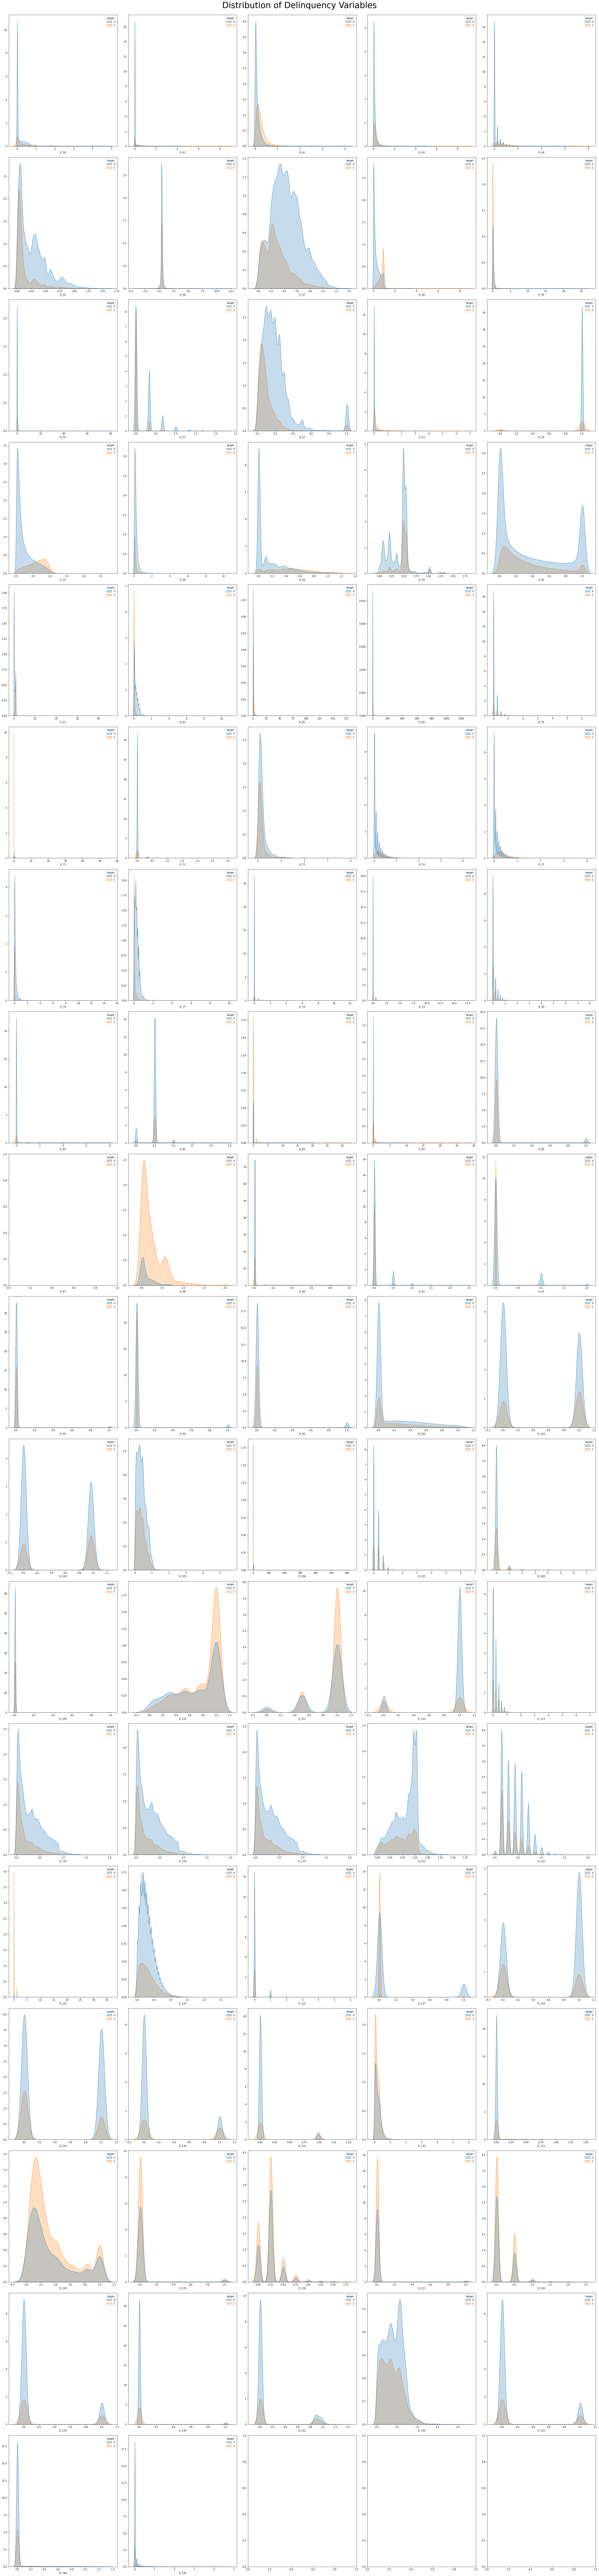

In [40]:
kdeplot(del_cols, df_del, 'Distribution of Delinquency Variables',(35,150))

In [41]:
gc.collect()

289294

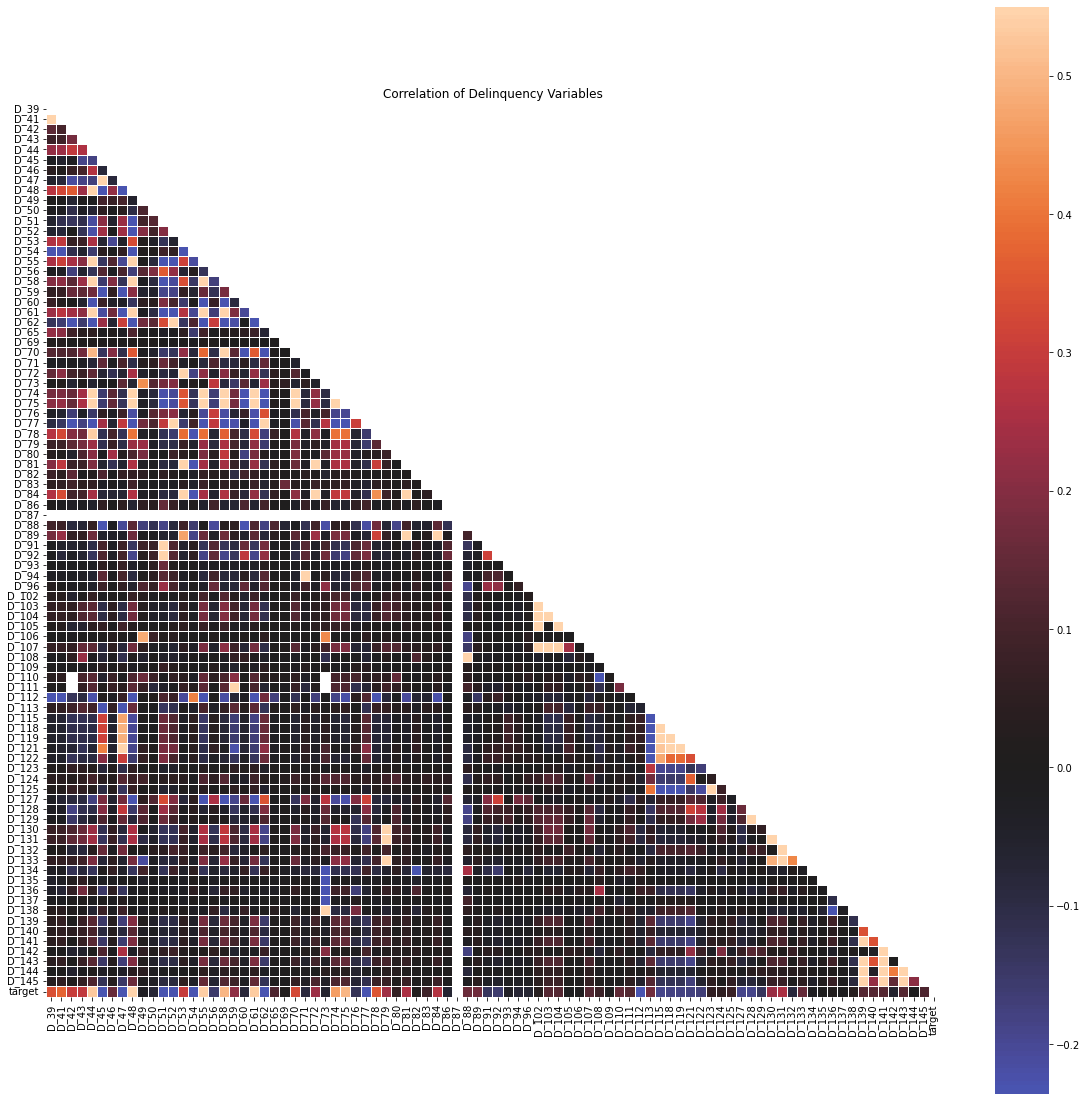

In [42]:
corr(df_del,'Correlation of Delinquency Variables',(20,20))

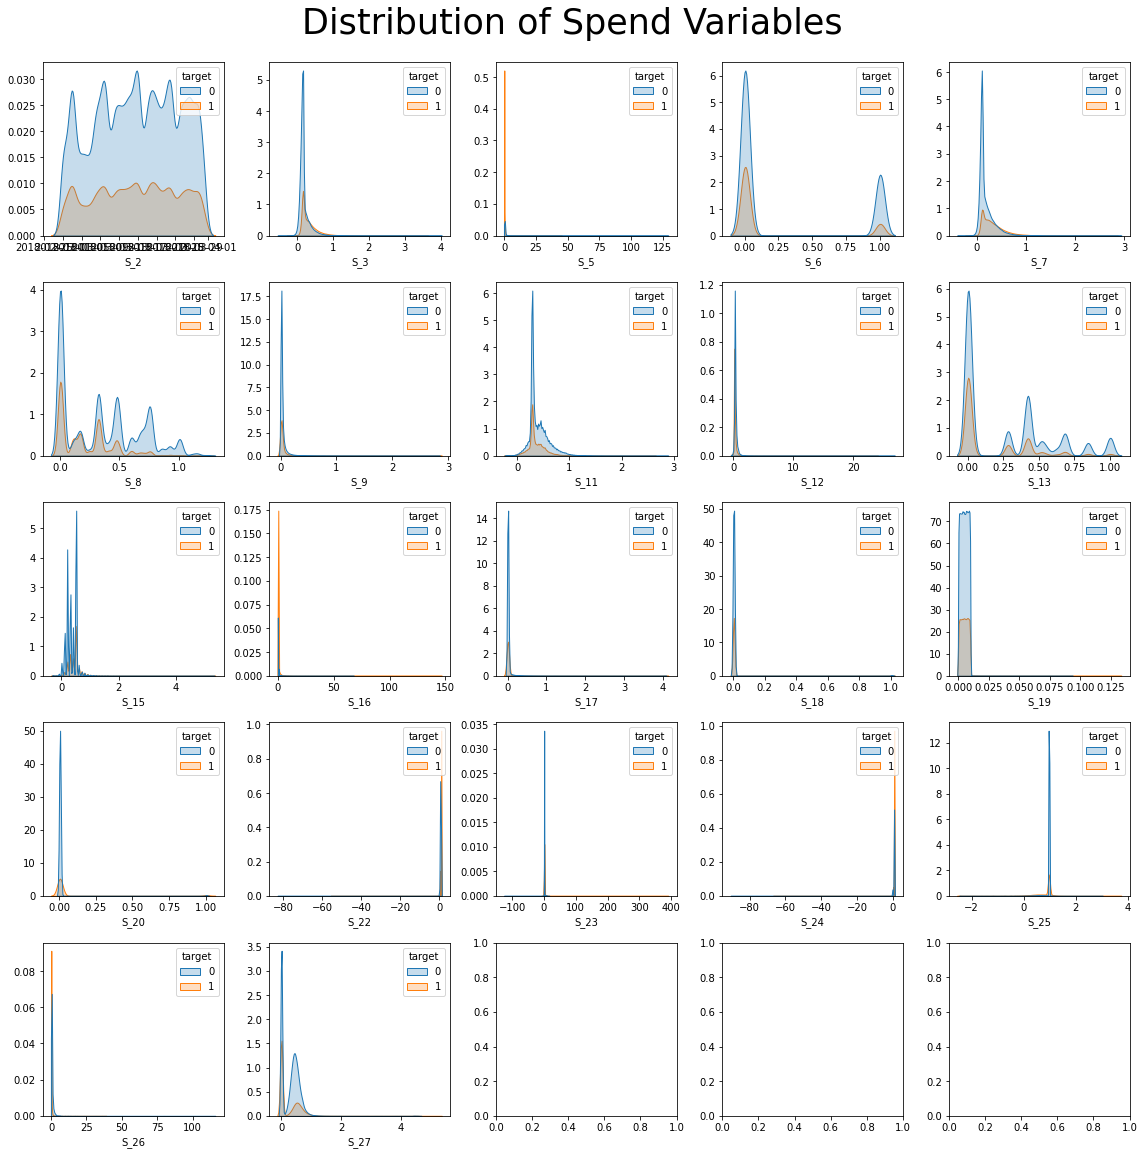

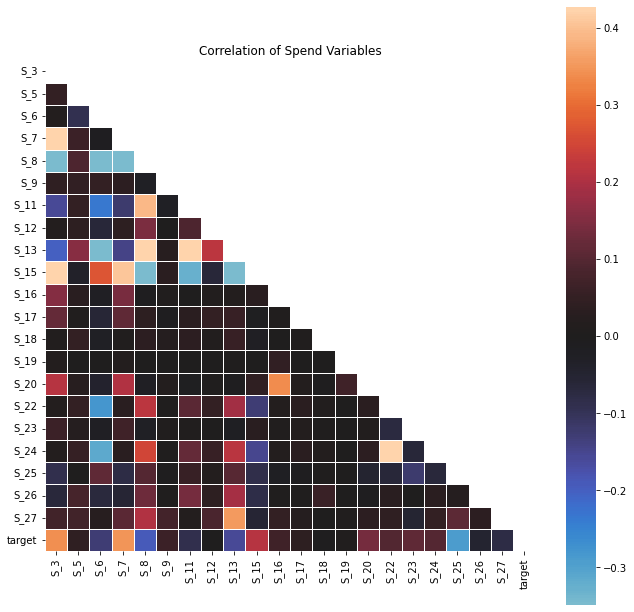

In [43]:
kdeplot(spd_cols,df_spd,'Distribution of Spend Variables',((16,16)))
corr(df_spd,'Correlation of Spend Variables',(11,11))

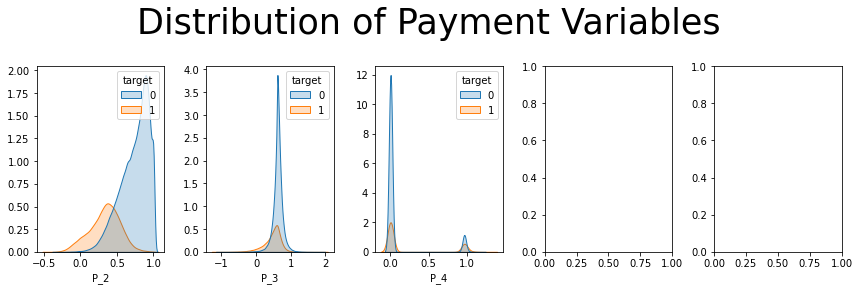

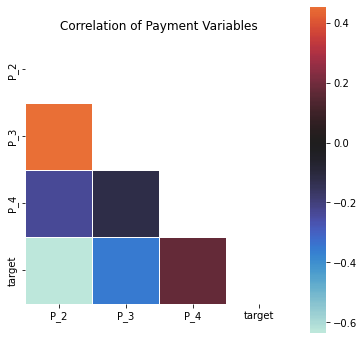

In [44]:
kdeplot(pay_cols,df_pay,'Distribution of Payment Variables',(12,4))
corr(df_pay,'Correlation of Payment Variables',(6,6))

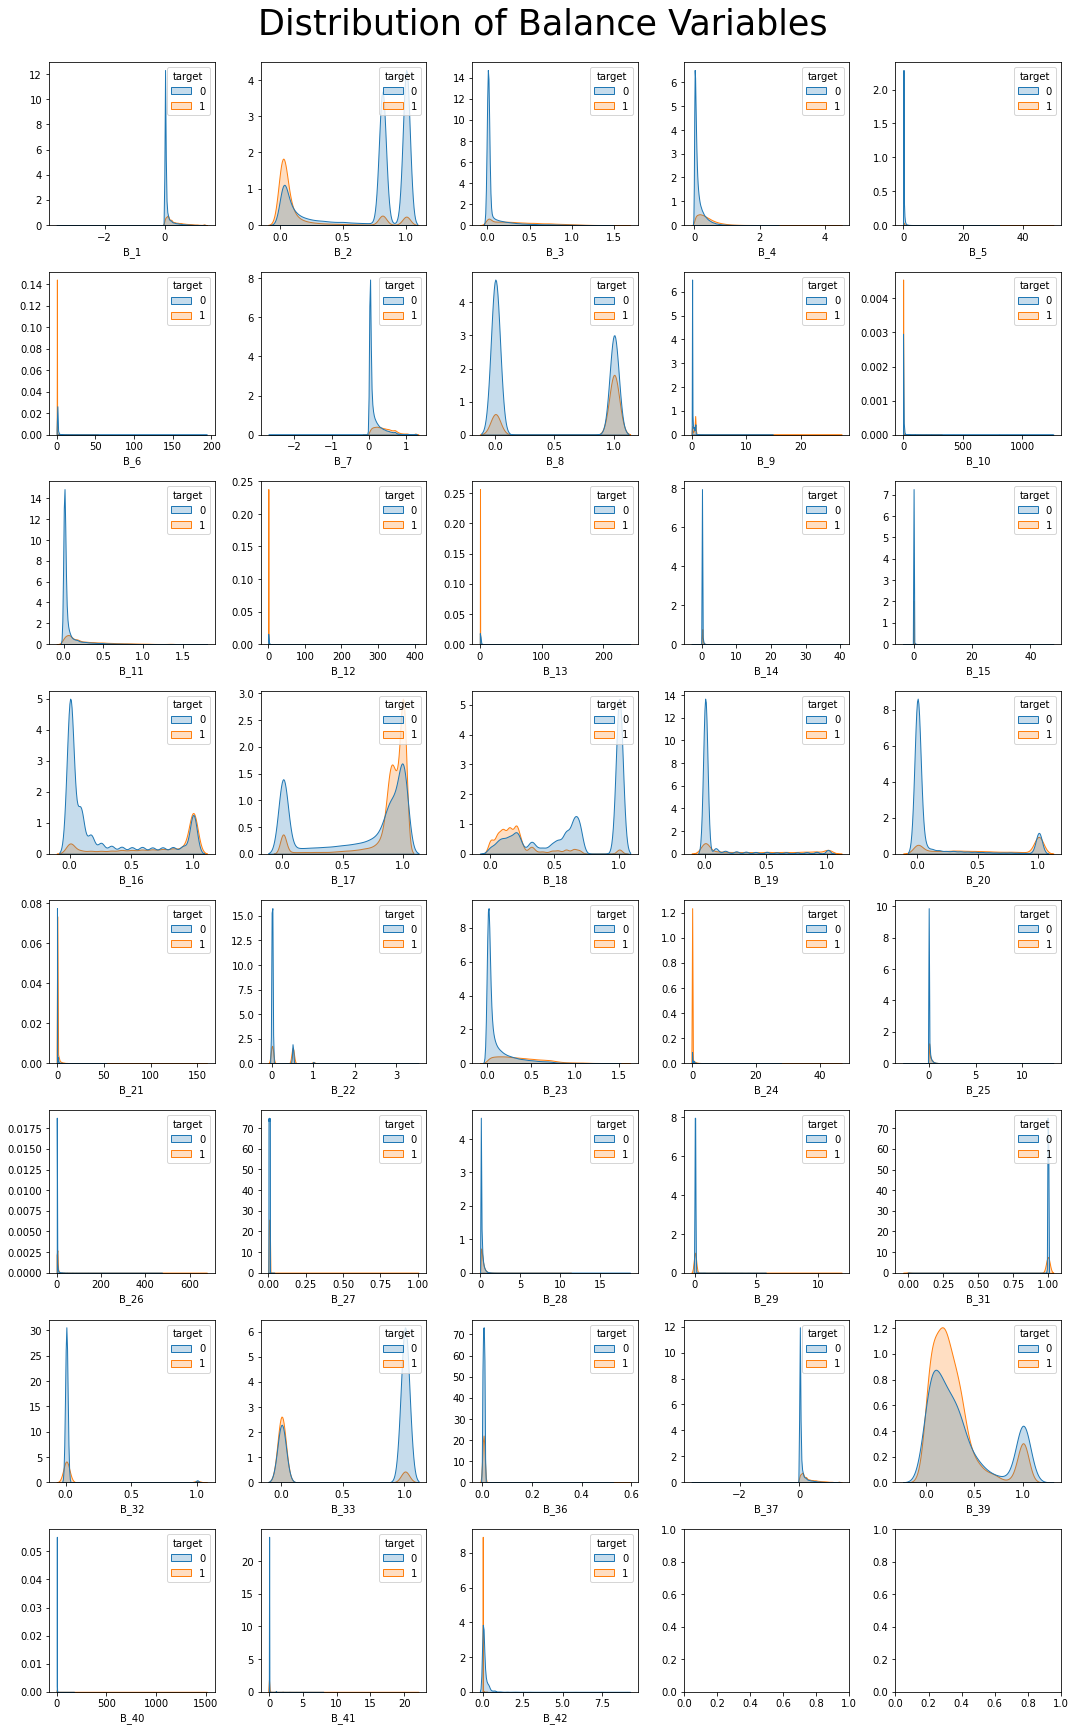

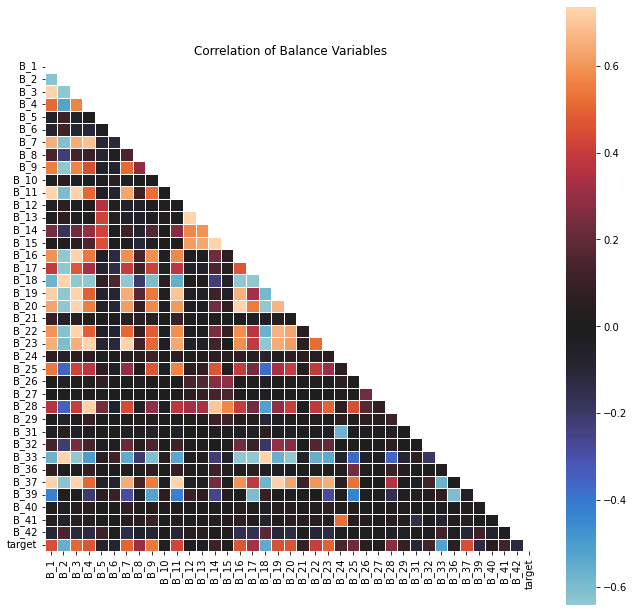

In [45]:
kdeplot(bal_cols,df_bal,'Distribution of Balance Variables',(15,24))
corr(df_bal,'Correlation of Balance Variables',(11,11))

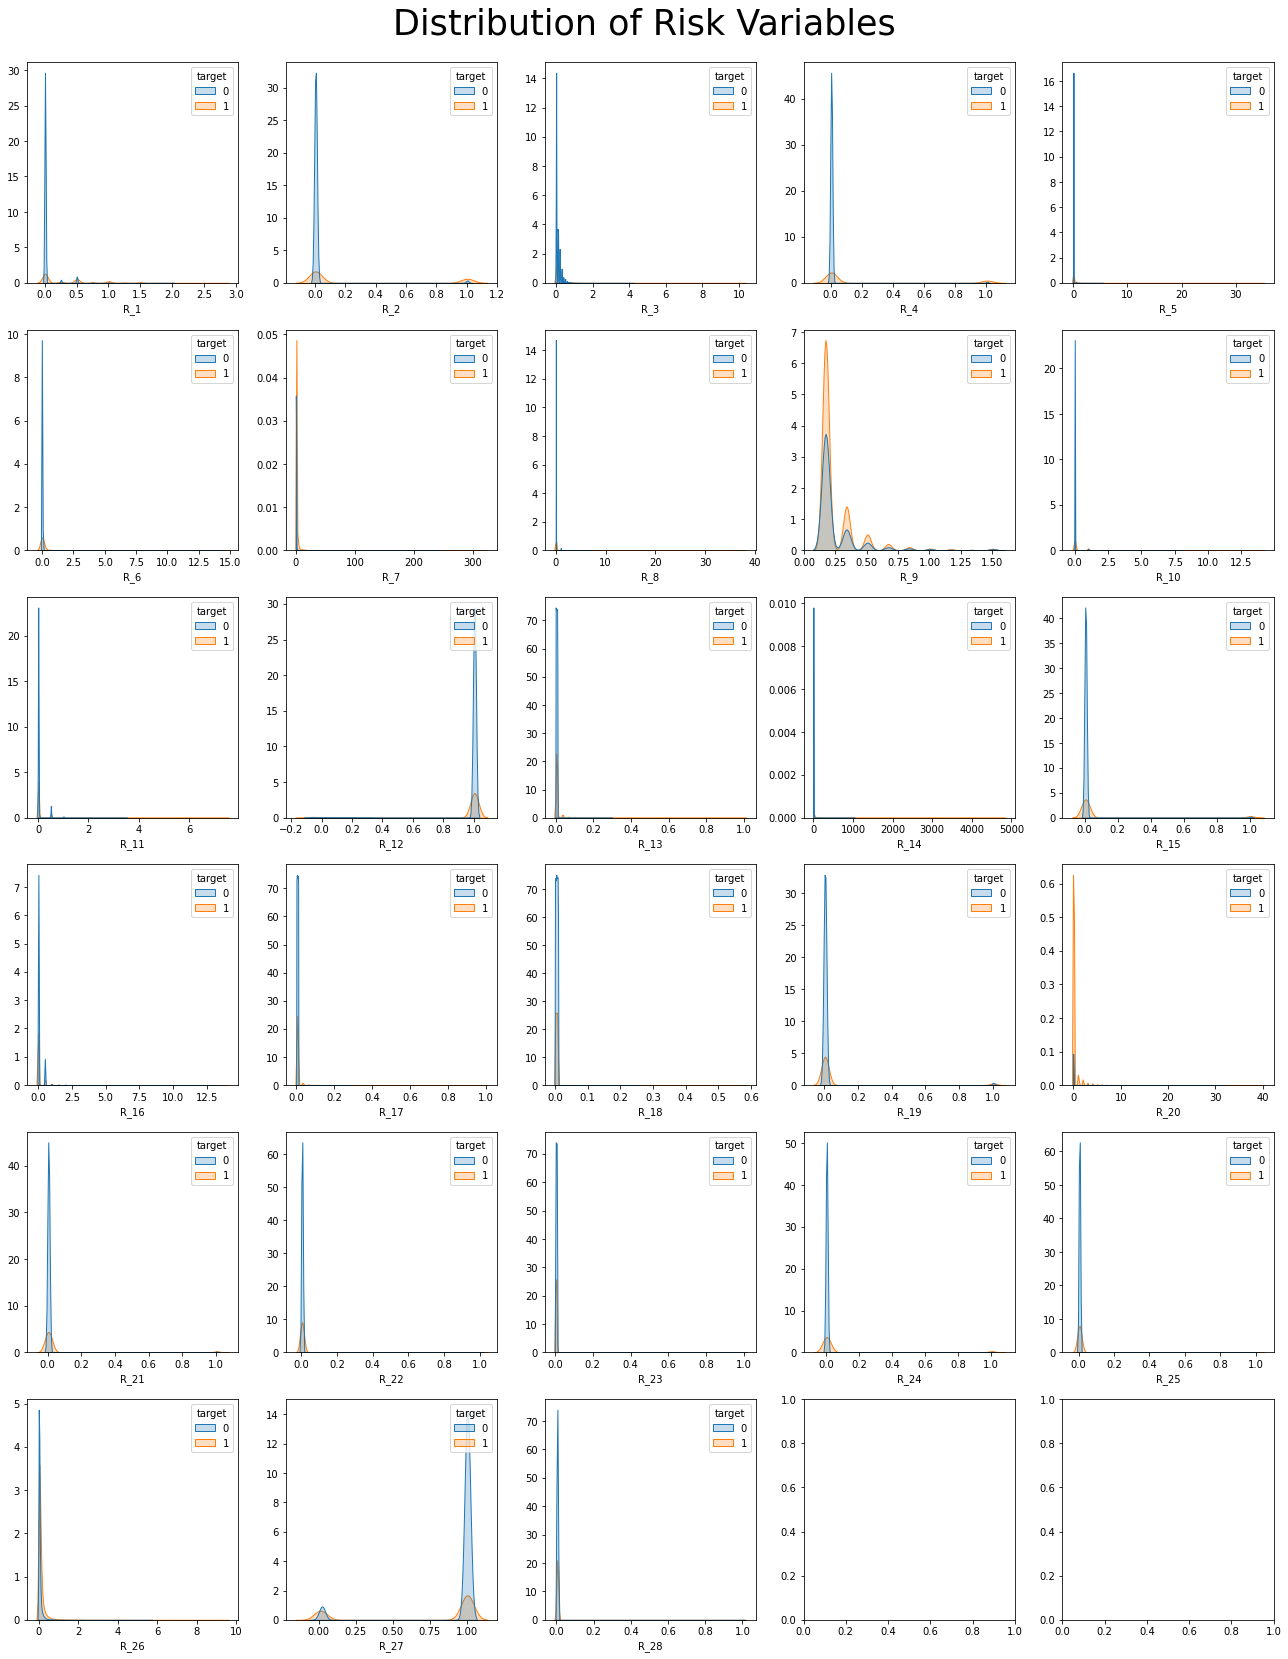

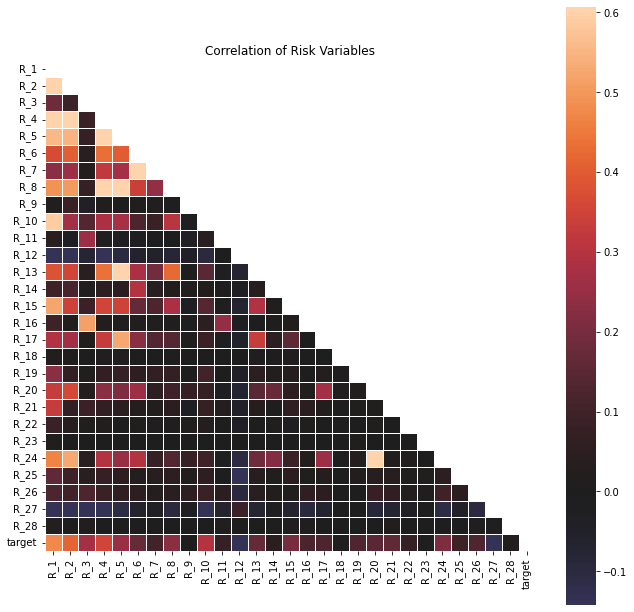

In [46]:
kdeplot(ris_cols,df_ris,'Distribution of Risk Variables',(18,23))
corr(df_ris,'Correlation of Risk Variables',(11,11))

In [47]:
import plotly.graph_objects as go
target = train_data1.corrwith(train_data1['target'], axis=0)
val = [str(round(v ,1) *100) + '%' for v in target.values]
fig = go.Figure()
fig.add_trace(go.Bar(y=target.index, x= target.values, orientation='h',text = val))
fig.update_layout(title = "Correlation of variables with Target",width = 700, height = 3000)

In [48]:
gc.collect()

102854

### **Model Training**

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat_feat in cat_var:
    train_data1[cat_feat] = le.fit_transform(train_data1[cat_feat])
    test_data1[cat_feat] = le.transform(test_data1[cat_feat])

In [50]:
train_data1.drop(['S_2'],axis=1,inplace=True)
test_data1.drop(['S_2'],axis=1,inplace=True)

In [51]:
X = train_data1.drop('target', axis=1) # Putting feature variables into X
y = train_data1['target'] # Putting target variable to y

In [52]:
from sklearn.model_selection import train_test_split # Importing the train test split library
X = train_data1.drop('target', axis=1) # Putting feature variables into X
y = train_data1['target'] # Putting target variable to y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y) # Splitting data into train and test set 75:25

In [54]:
gc.collect()

46

In [55]:
# Import metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix # Prints the correct and also incorrect values in number count .
from sklearn.metrics import f1_score #Combines precision, recall into a single metric by taking the harmonic mean
from sklearn.metrics import classification_report #Used to show the precision, recall, F1 Score, and support of our trained classification model.
from sklearn.metrics import roc_curve, auc, roc_auc_score #Shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).

**ROC curve**  : ROC curve (Receiver Operating Characteristics Curve) is a metric used to measure the performance of a classifier model. The ROC curve depicts the rate of true positives (The model correctly predicts the positive class) with respect to the rate of false positives (the model predicts as positive class but in actual case it is a negative class), highlighting the sensitivity (Sensitivity is a measure of how well a machine learning model can detect positive instances. It is also known as the true positive rate (TPR) or recall of the classifier model.

In [56]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0]) # X axis limit is from 0 to 1
    plt.ylim([0.0, 1.05]) # Y axis limit is from 0 to 1.05
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]') #The actual one is negative but predicted as positive
    plt.ylabel('True Positive Rate') #Both actual and predicted value came out negative
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

**Confusion matrix**   : A Confusion matrix is an n x n matrix used for evaluating the performance of a classification model. Here n is the number of target variables or target classes. The matrix compares the actual target values with those predicted by the machine learning model.

In [57]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    categoryNames = ['Paid','Default']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

**Precision Recall curve** : Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

In [58]:
from sklearn.metrics import precision_recall_curve 
def precision_recall_plot(y_true, y_probs, label):
   
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()

    fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    sns.lineplot(thresh, p, estimator=None,
                     label='Precision', ax=axis)
    axis.set_xlabel('Threshold')
    axis.set_ylabel('Precision')
    axis.legend(loc='lower left')
    axis_twin = axis.twinx()
    sns.lineplot(thresh, r, estimator=None,color='limegreen', label='Recall', ax=axis_twin)
    axis_twin.set_ylabel('Recall')
    axis_twin.set_ylim(0, 1)
    axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    fig.subplots_adjust(wspace=5)
    fig.tight_layout()
    display(fig)
    
    

In [59]:
def metric_All(clf_name,y,y_pred):
    accuracy_metric = metrics.accuracy_score(y, y_pred) #To check accuracy
    f1score_metric = f1_score(y, y_pred) #To see F1score
    confusion = metrics.confusion_matrix(y, y_pred)
    TP = confusion[0,0] # true positive 
    TN = confusion[1,1] # true negatives
    FP = confusion[1,0] # false positives
    FN = confusion[0,1] # false negatives
    sensitivity = TP / float(TP+FN) #Measure of how well a machine learning model can detect positive instances.
    specificity =  TN / float(TN+FP) # Metric that evaluates a model's ability to predict true negatives of each available category.
    print("Classification report")
    print(classification_report(y, y_pred))
    print("ROC curve")
    draw_roc(y, y_pred)
    roc_metric = metrics.roc_auc_score(y, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
    Plot_confusion_matrix(y, y_pred)
    precision_recall_plot(y, y_pred,clf_name)
    return (accuracy_metric,f1score_metric,sensitivity,specificity,roc_metric)


In [60]:
from lightgbm import LGBMClassifier , early_stopping , log_evaluation
from catboost import CatBoostClassifier

In [61]:
#Reference of these params took from: https://www.kaggle.com/code/kellibelcher/amex-default-prediction-eda-lgbm-baseline
params = {'boosting_type': 'gbdt',
          'n_estimators': 1000,
          'num_leaves': 50,
          'learning_rate': 0.05,
          'colsample_bytree': 0.9,
          'min_child_samples': 2000,
          'max_bins': 500,
          'reg_alpha': 2,
          'objective': 'binary',
          'random_state': 21}

In [62]:
classifiers = {
    "Light GBM": LGBMClassifier(**params),
    "Cat Boost Classifier": CatBoostClassifier(iterations = 1000, random_state = 21, nan_mode ='Min')
}

In [63]:
df_Results = pd.DataFrame(columns=['Model','Accuracy','F1 score','Sensitivity','Specificity','ROC value'])

In [64]:
gc.collect()

69

In [65]:
lgbm_probs = []
lgbm_preds = []
cat_probs = []
cat_preds = []

In [66]:
def model(clf, df_Results,  X_train,y_train, X_test, y_test):
    for i, (clf_name,clf) in enumerate(classifiers.items()):
        if clf_name == "Light GBM":
            clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
                                           callbacks=[early_stopping(100), log_evaluation(200)],
                                           eval_metric=['auc','binary_logloss'])
            lgbm_prob = clf.predict_proba(X_test)[:,1] #On split test set (Split from train dataset)
            lgbm_probs.append(lgbm_prob)
            
            #On the original test dataset
            lgbm_preds.append(clf.predict_proba(test_data1)[:, 1])
            
        elif clf_name == "Cat Boost Classifier":
            clf.fit(X_train, y_train,eval_set = [(X_test, y_test)], cat_features=cat_var,  verbose = 100)
            cat_prob = clf.predict_proba(X_test)[:,1] #On split test set (Split from train dataset)
            cat_probs.append(cat_prob) 
            
            #On the original test dataset
            cat_preds.append(clf.predict_proba(test_data1)[:, 1])
            
            
        print(clf_name)
        y_pred = clf.predict(X_test) #Predictions on the split set
        s = metric_All(clf_name,y_test,y_pred)
        y_test_pred = clf.predict(test_data1)   # Predictions on the original test dataset 
        df_Results = df_Results.append(pd.DataFrame({'Model': clf_name+ ' on test data','Accuracy': s[0] ,'F1 score':s[1],'Sensitivity':s[2],'Specificity':s[3],'ROC value': s[4]}, index=[0]),ignore_index= True)
        print('-'*60 )
        gc.collect()
    return df_Results

Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.964628	training's binary_logloss: 0.209893	valid_1's auc: 0.960468	valid_1's binary_logloss: 0.221034
[400]	training's auc: 0.97029	training's binary_logloss: 0.194258	valid_1's auc: 0.961122	valid_1's binary_logloss: 0.219025
[600]	training's auc: 0.974763	training's binary_logloss: 0.18163	valid_1's auc: 0.96115	valid_1's binary_logloss: 0.218879
Early stopping, best iteration is:
[550]	training's auc: 0.973715	training's binary_logloss: 0.184623	valid_1's auc: 0.961164	valid_1's binary_logloss: 0.218855
Light GBM
Classification report
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     85022
           1       0.81      0.81      0.81     29707

    accuracy                           0.90    114729
   macro avg       0.87      0.87      0.87    114729
weighted avg       0.90      0.90      0.90    114729

ROC curve


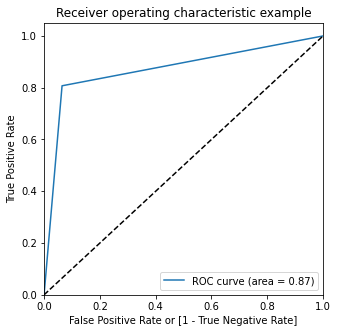

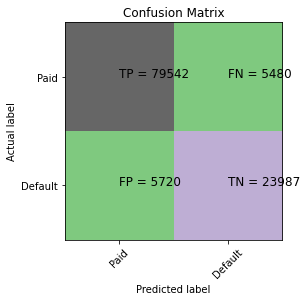

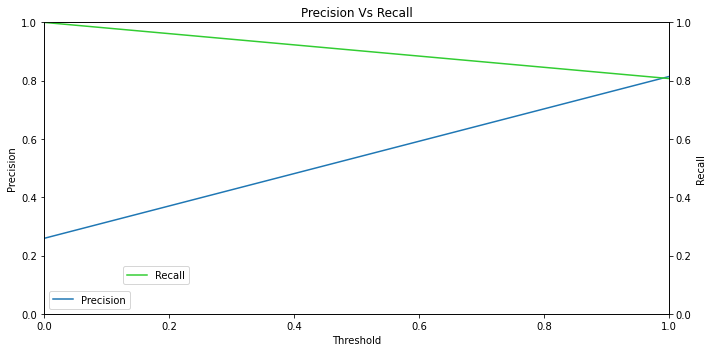

------------------------------------------------------------
Learning rate set to 0.134121
0:	learn: 0.5384411	test: 0.5383875	best: 0.5383875 (0)	total: 795ms	remaining: 13m 14s
100:	learn: 0.2249767	test: 0.2250574	best: 0.2250574 (100)	total: 57.3s	remaining: 8m 30s
200:	learn: 0.2170974	test: 0.2217183	best: 0.2217183 (200)	total: 1m 53s	remaining: 7m 29s
300:	learn: 0.2114689	test: 0.2207075	best: 0.2207033 (299)	total: 2m 48s	remaining: 6m 30s
400:	learn: 0.2064836	test: 0.2203039	best: 0.2203039 (400)	total: 3m 45s	remaining: 5m 36s
500:	learn: 0.2017583	test: 0.2201738	best: 0.2201738 (500)	total: 4m 40s	remaining: 4m 39s
600:	learn: 0.1973502	test: 0.2202146	best: 0.2201372 (520)	total: 5m 36s	remaining: 3m 43s
700:	learn: 0.1935019	test: 0.2202416	best: 0.2201372 (520)	total: 6m 31s	remaining: 2m 46s
800:	learn: 0.1894859	test: 0.2203926	best: 0.2201372 (520)	total: 7m 26s	remaining: 1m 51s
900:	learn: 0.1855900	test: 0.2204325	best: 0.2201372 (520)	total: 8m 23s	remaining: 5

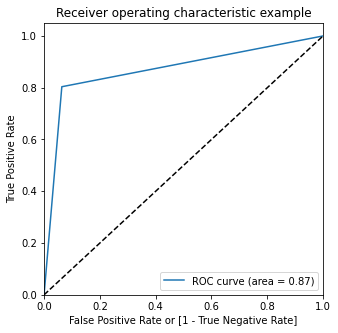

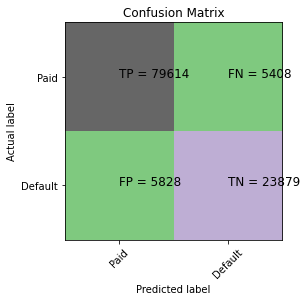

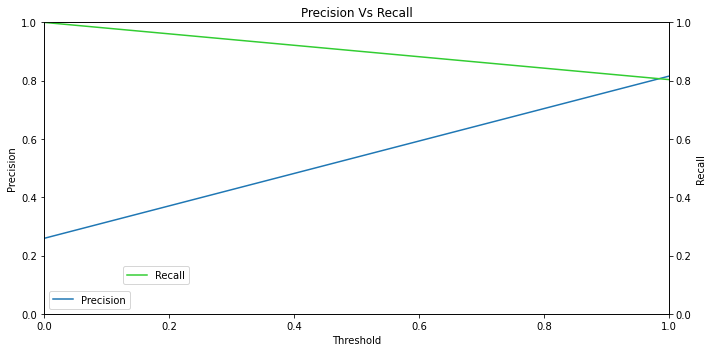

------------------------------------------------------------


In [67]:
df_Results = model(classifiers,df_Results, X_train,y_train, X_test, y_test)

In [68]:
len(np.mean(lgbm_preds, axis=0).tolist())

924621

In [69]:
len(np.mean(cat_preds, axis=0).tolist())

924621

In [70]:
df_Results

,Model,Accuracy,F1 score,Sensitivity,Specificity,ROC value
0,Light GBM on test data,0.902379,0.810728,0.935546,0.807453,0.871499
1,Cat Boost Classifier on test data,0.902065,0.809540,0.936393,0.803817,0.870105


From the above, it is clear that both the classifiers performed well. In this notebook, I am submitting LGBM predictions. The same can be done with Cat Boost predictions as well.

## **SUBMISSION**

In [71]:
sample_submission['prediction']=np.mean(lgbm_preds, axis=0)
df=pd.DataFrame(data={'Target':sample_submission['prediction'].apply(lambda x:1 if x > 0.5 else 0)})
df=df.Target.value_counts(normalize=True)
df.rename(index={0:'Paid', 1:'Default'},inplace=True)
fig=go.Figure()
fig.add_trace(go.Pie(labels=df.index, values=df*100, 
                     showlegend=True, hovertemplate = "%{label} Accounts: %{value:.2f}%<extra></extra>"))
fig.update_layout(title='Predicted Target Distribution', 
                  legend=dict(traceorder='reversed',y=1,x=1),
                  uniformtext_minsize=15, uniformtext_mode='hide',width=700)
fig.show()

In [72]:
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head()

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.027210
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.001875
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.029420
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.363580
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.900016


<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Thank you for reading. 
    Please let me know your feedback 🙂.
</div>